<h1>Determine Eigenvectors and Eigenvalues of Hermitian Matrices/Non Hermitian Matrices, sum of Eigenvectors and Eigenvalues</h1>

Use a neural network to try to predict eigenvectors and eigenvalues of non hermitian matrices and hermitian matrices. Hermitian matrices are symetric ad we will see if better neural network models for eigenvalues, eigenvectors can be generated for symmetric matrices versus non symettric matrices. <b>In Variable/Notebook setup set Hermitian=True to run this notebook with Hermitian matrices and False for non Hermitian Matrices</b>

<font style='color:red'>Hermitian Matrices are symetric meaning their trasposes are equal</font>

Also try to predict with a neural network the sum of eigenvectors and eigenvalues

Eigenvalues are 3 independent numbers, the eigenvectors for 3x3 matrices are 3 vectors of 3 elements - 9 elements. The neural network will try to predict the 3 eigenvalues and the 9 elements of the eigenvectors

The terms for the neural network will be matrix elements along with each matrix element multipled by every other matrix element. Alse the square of each matrix element. It is possible that terms involving the multiplication of multiple matrix elements could improve the model.

<b>The parameters for the neural network model designed for eigenvectors and eigenvalues will be as follows</b>: 
<br>(Credit: Paul Smith - Brainstation) 

#Create a new sequential model

model = keras.Sequential()

#Declare the hidden layers

model.add(layers.Dense(120, activation="relu"))
model.add(layers.Dense(120, activation="relu"))
model.add(layers.Dense(120, activation="relu"))
model.add(layers.Dense(60, activation="relu"))
model.add(layers.Dense(30, activation="relu"))

#Declare the output layer

model.add(layers.Dense(12, activation="linear"))

model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.MeanAbsoluteError(),
    # Metric used to evaluate model
    metrics=['mae']
)

<font style='color:red'>Results for Hermitian and Non Hermitian matrices will be summarized in the Conclusion</font>

## Table of Contents
[1. Variables/Notebook Setup](#Step-1:-Variables/Notebook-Setup) 

[2. Matrix Eigenvalue Eigenvector Generation](#Step-2:-Matrix-Eigenvalue-Eigenvector-Generation) <br>

[3. Eigenvector EigenValue Analysis](#Step-3:-Eigenvector-Eigenvalue-Analysis) <br>

[4. Results Analysis](#Step-4:-Results-Analysis) <br>

[5. Model and Neural Networks](#Step-5:-Model-and-Neural-Networks) <br> 

[6. Conclusion](#Step-6:Conclusion)

## Step 1: Variables/Notebook Setup

random seed: how the engine generates the random set of matrices, each random seed will generate a different set of random matrices

minCellValue: the minimum value of each matrix element

maxCellValue: the maximum value of each matrix element

numMatricesToGenerate: the number of matrices to use, more matrices more reliable results, but longer execution time

integersOnly: to use integers only in the tests

In [184]:
randomSeed = 13099

minCellValue = 0

maxCellValue = 6

NumMatricesToGenerate = 3501

integersOnly = True

Hermitian = False

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [186]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [187]:
#variables to be used throughout this notebook
matrixSize = 3
listVar = list(range(matrixSize))

## Step 2: Matrix Eigenvalue Eigenvector Generation

In [188]:
np.random.seed(randomSeed)
matList = []
indexes = []

In [189]:
#generate matrices for Hermitian and Non Hermitian matrices based on the setting 
#(can be modified in the Variables/Notebook Setup Section)

In [190]:
matList = []
i = 1
while i < NumMatricesToGenerate:
    if integersOnly: 
        mat = np.random.randint(minCellValue, maxCellValue+1, (matrixSize, matrixSize))
        if Hermitian:
            mat[2,2] = mat[0,0]
            mat[1,2] = mat[0,1]
            mat[2,1] = mat[1,0]
        matList.append([i,mat]) 
    else:
        mat = np.random.uniform(minCellValue, maxCellValue+1, (matrixSize, matrixSize))
        if Hermitian:
            mat[2,2] = mat[0,0]
            mat[1,2] = mat[0,1]
            mat[2,1] = mat[1,0]
        matList.append([i,mat]) 
    i += 1

In [191]:
matList

[[1,
  array([[0, 6, 5],
         [3, 0, 3],
         [4, 5, 5]])],
 [2,
  array([[5, 2, 6],
         [6, 3, 0],
         [2, 4, 4]])],
 [3,
  array([[0, 5, 4],
         [5, 6, 0],
         [2, 0, 1]])],
 [4,
  array([[3, 3, 1],
         [0, 0, 0],
         [1, 0, 2]])],
 [5,
  array([[5, 0, 6],
         [4, 4, 2],
         [0, 0, 2]])],
 [6,
  array([[6, 5, 3],
         [2, 6, 3],
         [3, 2, 1]])],
 [7,
  array([[3, 3, 1],
         [4, 5, 0],
         [0, 4, 5]])],
 [8,
  array([[4, 6, 0],
         [1, 5, 6],
         [4, 6, 3]])],
 [9,
  array([[2, 4, 6],
         [1, 5, 6],
         [0, 4, 3]])],
 [10,
  array([[1, 3, 3],
         [4, 5, 4],
         [1, 4, 1]])],
 [11,
  array([[0, 3, 1],
         [1, 2, 1],
         [0, 6, 0]])],
 [12,
  array([[5, 2, 1],
         [4, 0, 2],
         [6, 1, 2]])],
 [13,
  array([[2, 5, 6],
         [6, 5, 3],
         [0, 5, 1]])],
 [14,
  array([[1, 4, 1],
         [3, 0, 4],
         [6, 6, 6]])],
 [15,
  array([[5, 3, 4],
         [5, 4, 0

In [192]:
#convert to dataframe and generate parameters for the neural network
dflm = pd.DataFrame(data=matList)
dflm.columns = ['indexes','original']

for i in listVar:
    for j in listVar:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)

In [193]:
dflm = dflm.drop('indexes', axis=1) #unable to create a dataframe with one column (the matrix) so added an extra column then dropped

In [194]:
dflm.columns

Index(['original', 'original00', 'original01', 'original02', 'original10',
       'original11', 'original12', 'original20', 'original21', 'original22',
       'original00x00', 'original00x01', 'original00x02', 'original00x10',
       'original00x11', 'original00x12', 'original00x20', 'original00x21',
       'original00x22', 'original01x00', 'original01x01', 'original01x02',
       'original01x10', 'original01x11', 'original01x12', 'original01x20',
       'original01x21', 'original01x22', 'original02x00', 'original02x01',
       'original02x02', 'original02x10', 'original02x11', 'original02x12',
       'original02x20', 'original02x21', 'original02x22', 'original10x00',
       'original10x01', 'original10x02', 'original10x10', 'original10x11',
       'original10x12', 'original10x20', 'original10x21', 'original10x22',
       'original11x00', 'original11x01', 'original11x02', 'original11x10',
       'original11x11', 'original11x12', 'original11x20', 'original11x21',
       'original11x22',

In [195]:
dflm.describe()

,original00,original01,original02,original10,original11,original12,original20,original21,original22,original00x00,...,original21x22,original22x00,original22x01,original22x02,original22x10,original22x11,original22x12,original22x20,original22x21,original22x22
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.00000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,2.992000,3.015143,2.983714,3.009143,2.98400,2.957143,3.031143,3.036286,2.982286,12.926857,...,9.032286,8.999143,9.040857,8.846571,8.921714,8.912000,8.914571,9.125714,9.032286,12.873714
std,1.993973,1.969632,2.001862,1.984486,2.01375,1.989367,2.013076,1.980210,1.995200,12.437409,...,9.322113,9.432042,9.363467,9.290839,9.213956,9.388763,9.396196,9.535762,9.322113,12.438844
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,9.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,9.000000
75%,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,25.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,25.000000
max,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000


the parameters for the neural networks look good

In [196]:
#generate the eigenvectors and eigenvalues

In [197]:
dflm['eigen'] =  dflm.apply(lambda row: np.linalg.eig(row['original']), axis=1)

dflm['eigen1'] = dflm.apply(lambda row: row['eigen'][0][0], axis=1)
dflm['eigen2'] = dflm.apply(lambda row: row['eigen'][0][1], axis=1)
dflm['eigen3'] = dflm.apply(lambda row: row['eigen'][0][2], axis=1)

dflm['eigenv1'] = dflm.apply(lambda row: row['eigen'][1][0][0], axis=1)
dflm['eigenv2'] = dflm.apply(lambda row: row['eigen'][1][0][1], axis=1)
dflm['eigenv3'] = dflm.apply(lambda row: row['eigen'][1][0][2], axis=1)
dflm['eigenv4'] = dflm.apply(lambda row: row['eigen'][1][1][0], axis=1)
dflm['eigenv5'] = dflm.apply(lambda row: row['eigen'][1][1][1], axis=1)
dflm['eigenv6'] = dflm.apply(lambda row: row['eigen'][1][1][2], axis=1)
dflm['eigenv7'] = dflm.apply(lambda row: row['eigen'][1][2][0], axis=1)
dflm['eigenv8'] = dflm.apply(lambda row: row['eigen'][1][2][1], axis=1)
dflm['eigenv9'] = dflm.apply(lambda row: row['eigen'][1][2][2], axis=1)

In [198]:
dflm.columns.to_list()

['original',
 'original00',
 'original01',
 'original02',
 'original10',
 'original11',
 'original12',
 'original20',
 'original21',
 'original22',
 'original00x00',
 'original00x01',
 'original00x02',
 'original00x10',
 'original00x11',
 'original00x12',
 'original00x20',
 'original00x21',
 'original00x22',
 'original01x00',
 'original01x01',
 'original01x02',
 'original01x10',
 'original01x11',
 'original01x12',
 'original01x20',
 'original01x21',
 'original01x22',
 'original02x00',
 'original02x01',
 'original02x02',
 'original02x10',
 'original02x11',
 'original02x12',
 'original02x20',
 'original02x21',
 'original02x22',
 'original10x00',
 'original10x01',
 'original10x02',
 'original10x10',
 'original10x11',
 'original10x12',
 'original10x20',
 'original10x21',
 'original10x22',
 'original11x00',
 'original11x01',
 'original11x02',
 'original11x10',
 'original11x11',
 'original11x12',
 'original11x20',
 'original11x21',
 'original11x22',
 'original12x00',
 'original12x01',
 'orig

In [199]:
#check that all imaginary companents of the eigenvectors and eigenvalues are 0 and remove them from the data

In [200]:
np.imag(dflm[['eigen1','eigen2','eigen3','eigenv1','eigenv2','eigenv3','eigenv4','eigenv5','eigenv6','eigenv7','eigenv8','eigenv9']].max(axis=1)).max()

0.0

In [201]:
np.imag(dflm[['eigen1','eigen2','eigen3','eigenv1','eigenv2','eigenv3','eigenv4','eigenv5','eigenv6','eigenv7','eigenv8','eigenv9']].max(axis=1)).min()

0.0

In [202]:
dflm['eigen1'] = dflm.apply(lambda row: np.real(row['eigen'][0][0]), axis=1)
dflm['eigen2'] = dflm.apply(lambda row: np.real(row['eigen'][0][1]), axis=1)
dflm['eigen3'] = dflm.apply(lambda row: np.real(row['eigen'][0][2]), axis=1)

dflm['eigenv1'] = dflm.apply(lambda row: np.real(row['eigen'][1][0][0]), axis=1)
dflm['eigenv2'] = dflm.apply(lambda row: np.real(row['eigen'][1][0][1]), axis=1)
dflm['eigenv3'] = dflm.apply(lambda row: np.real(row['eigen'][1][0][2]), axis=1)
dflm['eigenv4'] = dflm.apply(lambda row: np.real(row['eigen'][1][1][0]), axis=1)
dflm['eigenv5'] = dflm.apply(lambda row: np.real(row['eigen'][1][1][1]), axis=1)
dflm['eigenv6'] = dflm.apply(lambda row: np.real(row['eigen'][1][1][2]), axis=1)
dflm['eigenv7'] = dflm.apply(lambda row: np.real(row['eigen'][1][2][0]), axis=1)
dflm['eigenv8'] = dflm.apply(lambda row: np.real(row['eigen'][1][2][1]), axis=1)
dflm['eigenv9'] = dflm.apply(lambda row: np.real(row['eigen'][1][2][2]), axis=1)

## Step 3: Eigenvector Eigenvalue Analysis

In [203]:
dflm[['eigen1','eigen2','eigen3','eigenv1','eigenv2','eigenv3','eigenv4','eigenv5','eigenv6','eigenv7','eigenv8','eigenv9']].describe()

,eigen1,eigen2,eigen3,eigenv1,eigenv2,eigenv3,eigenv4,eigenv5,eigenv6,eigenv7,eigenv8,eigenv9
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,7.013763,0.827607,1.116916,-0.023937,-0.154948,0.010159,-0.066350,0.123037,-0.335730,-0.074928,0.063735,0.305284
std,4.674032,3.237160,3.314374,0.580803,0.608561,0.475080,0.563868,0.509709,0.487273,0.571364,0.508706,0.520479
min,-7.154790,-6.945569,-6.204768,-0.987294,-1.000000,-0.992581,-0.975948,-1.000000,-1.000000,-0.981754,-1.000000,-0.986394
25%,5.600704,-1.312686,-1.126669,-0.567819,-0.698912,-0.383629,-0.582286,-0.300684,-0.711567,-0.592937,-0.370727,-0.029282
50%,8.520151,0.226508,0.525912,-0.103678,-0.371751,0.000000,-0.220471,0.184499,-0.476951,-0.257886,0.086269,0.470358
75%,10.212993,2.302776,2.554160,0.547034,0.454081,0.411071,0.495072,0.574690,-0.067735,0.494397,0.507478,0.718653
max,15.954278,13.324555,13.366843,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996074,1.000000


<b><font style='color:blue'>mean max min std all look good</font></b>

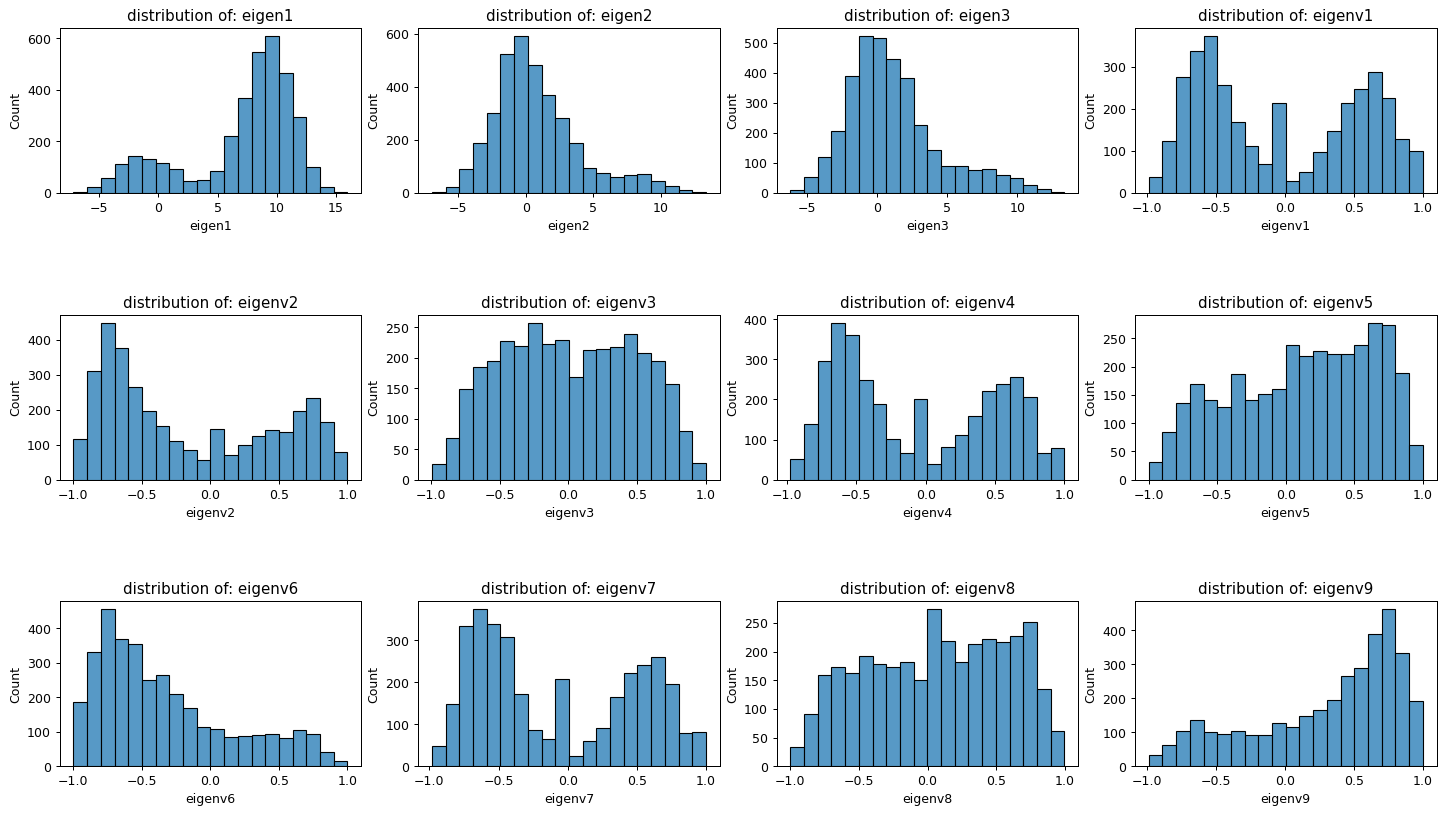

In [204]:
# let's check out the matrices cell values for inverse and randomly generated matrices

# use a 3x3 subplots layout, 16x9 aspect ratio
plt.subplots(3, 4, figsize=(16, 9), dpi=90)

# enumerate over column names
plot_df = dflm[['eigen1','eigen2','eigen3','eigenv1','eigenv2','eigenv3','eigenv4','eigenv5','eigenv6','eigenv7','eigenv8','eigenv9']].copy()
for i, column in enumerate(plot_df.columns, 1):

    # select a specific subplot canvas
    plt.subplot(3, 4, i)

    # plot histogram
    sns.histplot(data=plot_df, x=column, bins=20)

    # customise layout - add title and remove top+right borders
    plt.title("distribution of: " + column)

# add padding between subplots
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

<b><font style='color:blue'>interesting the distribution of values accross eigenvalues and eigenvectors. Eigenvector components 4 6 7 for Hermitian Matrices are distributed to both sides of 0.0<br>Eigenvalues 2 3 are somewhat normal for Hermitian matrices </font></b>

## Step 5: Model and Neural Networks

In [205]:
# random seeds for reproducibility
tf.random.set_seed(123)

coords = []
fit = []
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(120, activation="relu")) 
model.add(layers.Dense(120, activation="relu"))
model.add(layers.Dense(120, activation="relu"))
model.add(layers.Dense(60, activation="relu"))
model.add(layers.Dense(30, activation="relu"))

# Declare the output layer
model.add(layers.Dense(12, activation="linear"))

model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.MeanAbsoluteError(),
    # Metric used to evaluate model
    metrics=['mae']
)

In [206]:
#neural network for eigenvalues

In [207]:
dflm2 = dflm.copy()
eigenResults = []
for i in (1,2,3):
    dfl = dflm2.copy()
    y = dfl['eigen'+str(i)]
    dfl.drop('original', axis=1, inplace=True)
    dfl.drop('eigen', axis=1, inplace=True)
    X = dfl[dfl.columns]
    X_withconstant = sm.add_constant(X)
    history = model.fit(X_withconstant, y, epochs=100, verbose=1)
    # Evaluate the network
    train_accuracy = min(history.history["mae"])
    result = model.evaluate(X_withconstant,y, verbose=0)
    eigenResults.append(['eigen'+str(i),train_accuracy])

Epoch 1/100
110/110 [==============================] - 1s 3ms/step - loss: 2.9140 - mae: 2.9140
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.7480 - mae: 0.7480
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4723 - mae: 0.4723
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.3457 - mae: 0.3457
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.3122 - mae: 0.3122
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2858 - mae: 0.2858
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2549 - mae: 0.2549
Epoch 8/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2318 - mae: 0.2318
Epoch 9/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2303 - mae: 0.2303
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2340 - mae: 0.2340
Epoch 11/100
110/110 [=================

110/110 [==============================] - 0s 2ms/step - loss: 0.1077 - mae: 0.1077
Epoch 86/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1028 - mae: 0.1028
Epoch 87/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1001 - mae: 0.1001
Epoch 88/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0917 - mae: 0.0917
Epoch 89/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.1554
Epoch 90/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1006 - mae: 0.1006
Epoch 91/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0913 - mae: 0.0913
Epoch 92/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1047 - mae: 0.1047
Epoch 93/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0918 - mae: 0.0918
Epoch 94/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1133 - mae: 0.1133
Epoch 95/100
110/110 [=====================

110/110 [==============================] - 0s 2ms/step - loss: 0.0595 - mae: 0.0595
Epoch 70/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0706 - mae: 0.0706
Epoch 71/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0731 - mae: 0.0731
Epoch 72/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0736 - mae: 0.0736
Epoch 73/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0677 - mae: 0.0677
Epoch 74/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0690 - mae: 0.0690
Epoch 75/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0600 - mae: 0.0600
Epoch 76/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0630 - mae: 0.0630
Epoch 77/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0559 - mae: 0.0559
Epoch 78/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0650 - mae: 0.0650
Epoch 79/100
110/110 [=====================

110/110 [==============================] - 0s 2ms/step - loss: 0.0762 - mae: 0.0762
Epoch 54/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0673 - mae: 0.0673
Epoch 55/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0639 - mae: 0.0639
Epoch 56/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0697 - mae: 0.0697
Epoch 57/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0706 - mae: 0.0706
Epoch 58/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0854 - mae: 0.0854
Epoch 59/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0791 - mae: 0.0791
Epoch 60/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0661 - mae: 0.0661
Epoch 61/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0762 - mae: 0.0762
Epoch 62/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0636 - mae: 0.0636
Epoch 63/100
110/110 [=====================

In [208]:
#display Mean Average Error for the model - results will be summaried in conclusion

In [209]:
for i in eigenResults:
    print("MAE for: "+str(i[0])+" is: "+str(i[1]))

MAE for: eigen1 is: 0.08977599442005157
MAE for: eigen2 is: 0.048604559153318405
MAE for: eigen3 is: 0.05298550799489021


In [210]:
#we know that the range is very narrow - no extreme values so dividing the mean average error by the range is a good metric

In [211]:
for i in eigenResults:
    print("%MAE when considering the mean is for: "+str(i[0])+" is: "+str(i[1]/dflm[i[0]].mean()))

%MAE when considering the mean is for: eigen1 is: 0.012799975518494752
%MAE when considering the mean is for: eigen2 is: 0.05872905002846366
%MAE when considering the mean is for: eigen3 is: 0.047439117560727266


In [212]:
#Neural Network for sum of Eigenvalues

In [213]:
dfl = dflm2.copy()
y = dfl['eigen1']+dfl['eigen2']+dfl['eigen3']
dfl.drop('original', axis=1, inplace=True)
dfl.drop('eigen', axis=1, inplace=True)
X = dfl[dfl.columns]
X_withconstant = sm.add_constant(X)
history = model.fit(X_withconstant, y, epochs=100, verbose=1)
# Evaluate the network
train_accuracy = min(history.history["mae"])

Epoch 1/100
110/110 [==============================] - 0s 3ms/step - loss: 1.3394 - mae: 1.3394
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2859 - mae: 0.2859
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1979 - mae: 0.1979
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1664 - mae: 0.1664
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1531 - mae: 0.1531
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1345 - mae: 0.1345
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1310 - mae: 0.1310
Epoch 8/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1245 - mae: 0.1245
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0999 - mae: 0.0999
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1118 - mae: 0.1118
Epoch 11/100
110/110 [=================

110/110 [==============================] - 0s 2ms/step - loss: 0.0601 - mae: 0.0601
Epoch 86/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0535 - mae: 0.0535
Epoch 87/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0592 - mae: 0.0592
Epoch 88/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0788 - mae: 0.0788
Epoch 89/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0617 - mae: 0.0617
Epoch 90/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0584 - mae: 0.0584
Epoch 91/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0529 - mae: 0.0529
Epoch 92/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0454 - mae: 0.0454
Epoch 93/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0621 - mae: 0.0621
Epoch 94/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0608 - mae: 0.0608
Epoch 95/100
110/110 [=====================

In [214]:
#display results for sum of eigenvalues

In [215]:
sumeigenvaluesMAE = train_accuracy
sumeigenvaluesMAEpercent = train_accuracy/((dfl['eigen1']+dfl['eigen2']+dfl['eigen3']).max()-(dfl['eigen1']+dfl['eigen2']+dfl['eigen3']).min())
print("MAE for sum of eigenvalues is: "+str(train_accuracy))
print("%MAE for sum of eigenvalues when considering the range is: "+str(train_accuracy/((dfl['eigen1']+dfl['eigen2']+dfl['eigen3']).max()-(dfl['eigen1']+dfl['eigen2']+dfl['eigen3']).min())))

MAE for sum of eigenvalues is: 0.04535982757806778
%MAE for sum of eigenvalues when considering the range is: 0.0025199904210037624


In [216]:
#Neural Network for Eigenvector elements

In [217]:
dflm2 = dflm.copy()
eigenvResults = []
for i in (1,2,3,4,5,6,7,8,9):
    dfl = dflm2.copy()
    y = dfl['eigenv'+str(i)]
    dfl.drop('original', axis=1, inplace=True)
    dfl.drop('eigen', axis=1, inplace=True)
    X = dfl[dfl.columns]
    X_withconstant = sm.add_constant(X)
    history = model.fit(X_withconstant, y, epochs=100, verbose=1)
    # Evaluate the network
    train_accuracy = min(history.history["mae"])
    eigenvResults.append(['eigenv'+str(i),train_accuracy])

Epoch 1/100
110/110 [==============================] - 0s 2ms/step - loss: 1.4362 - mae: 1.4362
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4844 - mae: 0.4844
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.3979 - mae: 0.3979
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2866 - mae: 0.2866
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2234 - mae: 0.2234
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1700 - mae: 0.1700
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1511 - mae: 0.1511
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1320 - mae: 0.1320
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1155 - mae: 0.1155
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1105 - mae: 0.1105
Epoch 11/100
110/110 [=================

110/110 [==============================] - 0s 2ms/step - loss: 0.0197 - mae: 0.0197
Epoch 86/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.0191
Epoch 87/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0204 - mae: 0.0204
Epoch 88/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0227 - mae: 0.0227
Epoch 89/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0203 - mae: 0.0203
Epoch 90/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0253 - mae: 0.0253
Epoch 91/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0202 - mae: 0.0202
Epoch 92/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0210 - mae: 0.0210
Epoch 93/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.0189
Epoch 94/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0183 - mae: 0.0183
Epoch 95/100
110/110 [=====================

110/110 [==============================] - 0s 2ms/step - loss: 0.0418 - mae: 0.0418
Epoch 70/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0438 - mae: 0.0438
Epoch 71/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0427 - mae: 0.0427
Epoch 72/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0411 - mae: 0.0411
Epoch 73/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0400 - mae: 0.0400
Epoch 74/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0405 - mae: 0.0405
Epoch 75/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0393 - mae: 0.0393
Epoch 76/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0388 - mae: 0.0388
Epoch 77/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0405 - mae: 0.0405
Epoch 78/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0387 - mae: 0.0387
Epoch 79/100
110/110 [=====================

110/110 [==============================] - 0s 2ms/step - loss: 0.0416 - mae: 0.0416
Epoch 54/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0407 - mae: 0.0407
Epoch 55/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0407 - mae: 0.0407
Epoch 56/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0398 - mae: 0.0398
Epoch 57/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0376 - mae: 0.0376
Epoch 58/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0403 - mae: 0.0403
Epoch 59/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0375 - mae: 0.0375
Epoch 60/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0372 - mae: 0.0372
Epoch 61/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0361 - mae: 0.0361
Epoch 62/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0363 - mae: 0.0363
Epoch 63/100
110/110 [=====================

110/110 [==============================] - 0s 2ms/step - loss: 0.0301 - mae: 0.0301
Epoch 38/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0292 - mae: 0.0292
Epoch 39/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0291 - mae: 0.0291
Epoch 40/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0285 - mae: 0.0285
Epoch 41/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0288 - mae: 0.0288
Epoch 42/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0282 - mae: 0.0282
Epoch 43/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0268 - mae: 0.0268
Epoch 44/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0269 - mae: 0.0269
Epoch 45/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0267 - mae: 0.0267
Epoch 46/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0251 - mae: 0.0251
Epoch 47/100
110/110 [=====================

110/110 [==============================] - 0s 2ms/step - loss: 0.0669 - mae: 0.0669
Epoch 22/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0627 - mae: 0.0627
Epoch 23/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0640 - mae: 0.0640
Epoch 24/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0596 - mae: 0.0596
Epoch 25/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0581 - mae: 0.0581
Epoch 26/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0621 - mae: 0.0621
Epoch 27/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0573 - mae: 0.0573
Epoch 28/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0568 - mae: 0.0568
Epoch 29/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0571 - mae: 0.0571
Epoch 30/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0524 - mae: 0.0524
Epoch 31/100
110/110 [=====================

110/110 [==============================] - 0s 2ms/step - loss: 0.1251 - mae: 0.1251
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1170 - mae: 0.1170
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1029 - mae: 0.1029
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1031 - mae: 0.1031
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0944 - mae: 0.0944
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0887 - mae: 0.0887
Epoch 11/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0841 - mae: 0.0841
Epoch 12/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0814 - mae: 0.0814
Epoch 13/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0761 - mae: 0.0761
Epoch 14/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0732 - mae: 0.0732
Epoch 15/100
110/110 [=========================

110/110 [==============================] - 0s 2ms/step - loss: 0.0298 - mae: 0.0298
Epoch 90/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0306 - mae: 0.0306
Epoch 91/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0305 - mae: 0.0305
Epoch 92/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0305 - mae: 0.0305
Epoch 93/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0304 - mae: 0.0304
Epoch 94/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0282 - mae: 0.0282
Epoch 95/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0288 - mae: 0.0288
Epoch 96/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0281 - mae: 0.0281
Epoch 97/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0298 - mae: 0.0298
Epoch 98/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0295 - mae: 0.0295
Epoch 99/100
110/110 [=====================

110/110 [==============================] - 0s 2ms/step - loss: 0.0184 - mae: 0.0184
Epoch 74/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0177 - mae: 0.0177
Epoch 75/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0173 - mae: 0.0173
Epoch 76/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.0174
Epoch 77/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0186 - mae: 0.0186
Epoch 78/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0152 - mae: 0.0152
Epoch 79/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.0174
Epoch 80/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0172 - mae: 0.0172
Epoch 81/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0172 - mae: 0.0172
Epoch 82/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0166 - mae: 0.0166
Epoch 83/100
110/110 [=====================

110/110 [==============================] - 0s 2ms/step - loss: 0.0367 - mae: 0.0367
Epoch 58/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0338 - mae: 0.0338
Epoch 59/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0327 - mae: 0.0327
Epoch 60/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0319 - mae: 0.0319
Epoch 61/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0323 - mae: 0.0323
Epoch 62/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0324 - mae: 0.0324
Epoch 63/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0312 - mae: 0.0312
Epoch 64/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0314 - mae: 0.0314
Epoch 65/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0320 - mae: 0.0320
Epoch 66/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0311 - mae: 0.0311
Epoch 67/100
110/110 [=====================

110/110 [==============================] - 0s 2ms/step - loss: 0.0445 - mae: 0.0445
Epoch 42/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0442 - mae: 0.0442
Epoch 43/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0411 - mae: 0.0411
Epoch 44/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0416 - mae: 0.0416
Epoch 45/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0435 - mae: 0.0435
Epoch 46/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0400 - mae: 0.0400
Epoch 47/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0406 - mae: 0.0406
Epoch 48/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0392 - mae: 0.0392
Epoch 49/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0398 - mae: 0.0398
Epoch 50/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0390 - mae: 0.0390
Epoch 51/100
110/110 [=====================

In [218]:
#print results for eigenvector elements

In [219]:
for i in eigenvResults:
    print("MAE for: "+str(i[0])+" is: "+str(i[1]))

MAE for: eigenv1 is: 0.018327508121728897
MAE for: eigenv2 is: 0.032443817704916
MAE for: eigenv3 is: 0.02878502570092678
MAE for: eigenv4 is: 0.016695786267518997
MAE for: eigenv5 is: 0.024746399372816086
MAE for: eigenv6 is: 0.027383461594581604
MAE for: eigenv7 is: 0.014532906003296375
MAE for: eigenv8 is: 0.024437593296170235
MAE for: eigenv9 is: 0.0289979949593544


In [220]:
#we know that the range is very narrow - no extreme values so dividing the mean average error by the range is a good metric

In [221]:
for i in eigenvResults:
    print("%MAE when considering the range for: "+str(i[0])+" is: "+str(i[1]/(dflm[i[0]].max()-dflm[i[0]].min())))

%MAE when considering the range for: eigenv1 is: 0.00922234141703237
%MAE when considering the range for: eigenv2 is: 0.016221908852458
%MAE when considering the range for: eigenv3 is: 0.014446097394965583
%MAE when considering the range for: eigenv4 is: 0.008449505350663284
%MAE when considering the range for: eigenv5 is: 0.012373199686408043
%MAE when considering the range for: eigenv6 is: 0.013691730797290802
%MAE when considering the range for: eigenv7 is: 0.007333356273614976
%MAE when considering the range for: eigenv8 is: 0.012242832301466345
%MAE when considering the range for: eigenv9 is: 0.014598310340887257


In [222]:
#Neural Network for sum of all eigenvalue elements

In [223]:
dfl = dflm2.copy()
y = dfl['eigenv1']+dfl['eigenv2']+dfl['eigenv3']+dfl['eigenv4']+dfl['eigenv5']+dfl['eigenv6']+dfl['eigenv7']+dfl['eigenv8']+dfl['eigenv9']
dfl.drop('original', axis=1, inplace=True)
dfl.drop('eigen', axis=1, inplace=True)
X = dfl[dfl.columns]
X_withconstant = sm.add_constant(X)
history = model.fit(X_withconstant, y, epochs=100, verbose=1)
# Evaluate the network
train_accuracy = min(history.history["mae"])

Epoch 1/100
110/110 [==============================] - 0s 2ms/step - loss: 0.9355 - mae: 0.9355
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4142 - mae: 0.4142
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.3358 - mae: 0.3358
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2878 - mae: 0.2878
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2431 - mae: 0.2431
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2158 - mae: 0.2158
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2133 - mae: 0.2133
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1860 - mae: 0.1860
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1743 - mae: 0.1743
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1706 - mae: 0.1706
Epoch 11/100
110/110 [=================

110/110 [==============================] - 0s 2ms/step - loss: 0.0658 - mae: 0.0658
Epoch 86/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0632 - mae: 0.0632
Epoch 87/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0617 - mae: 0.0617
Epoch 88/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0623 - mae: 0.0623
Epoch 89/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0646 - mae: 0.0646
Epoch 90/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0636 - mae: 0.0636
Epoch 91/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0656 - mae: 0.0656
Epoch 92/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0607 - mae: 0.0607
Epoch 93/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0650 - mae: 0.0650
Epoch 94/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0594 - mae: 0.0594
Epoch 95/100
110/110 [=====================

In [224]:
#Results for sum of eigenvector elements

In [225]:
sumeigenvectorsMAE=train_accuracy
sumeigenvectorsMEApercent=train_accuracy/(y.max()-y.min())

print("MAE for sum of eigenvectors is: "+str(sumeigenvectorsMAE))
print("%MAE for sum of eigenvectors when considering the range is: "+str(sumeigenvectorsMEApercent))

MAE for sum of eigenvectors is: 0.057438261806964874
%MAE for sum of eigenvectors when considering the range is: 0.007373690011779612


## Step 6:Conclusion

The results are summarized based on MEA of the best neural network model I was able to generate. Accross the available data the neural network analysis generates a mean average error. Instead of test train methodology I will use the mean error over then entire available data which will be more accurate then a small test dataset although when randomied it will probably be the same however this eliminites the step of a test mean average error generation.

I will also consider the Mean Average Error as a percentage over the range of values for eigenvalue and eigenvector values as a metric for how good the Neural Network Model is

In [226]:
resultsList = []
resultsListMAE = []
for i in eigenResults:
    resultsList.append(["MAE for: "+str(i[0]),"{:1.4f}".format(i[1])])
for i in eigenResults:
    resultsListMAE.append(["%MAE for: "+str(i[0]),"{:1.4f}".format(i[1]/dflm[i[0]].mean())])
for i in eigenvResults:
    resultsList.append(["MAE for: "+str(i[0]),"{:1.4f}".format(i[1])])
for i in eigenvResults:
    resultsListMAE.append(["%MAE for: "+str(i[0]),"{:1.4f}".format(i[1]/(dflm[i[0]].max()-dflm[i[0]].min()))])
resultsList.append(['sumEigenvectorMAE',"{:1.4f}".format(sumeigenvectorsMAE)])
resultsListMAE.append(['sumEigenvectorMAE%',"{:1.4f}".format(sumeigenvectorsMEApercent)])
resultsList.append(['sumEigenvaluesMAE',"{:1.4f}".format(sumeigenvaluesMAE)])
resultsListMAE.append(['sumEigenvaluesMAE%',"{:1.4f}".format(sumeigenvaluesMAEpercent)])

In [227]:
resultsList

[['MAE for: eigen1', '0.0898'],
 ['MAE for: eigen2', '0.0486'],
 ['MAE for: eigen3', '0.0530'],
 ['MAE for: eigenv1', '0.0183'],
 ['MAE for: eigenv2', '0.0324'],
 ['MAE for: eigenv3', '0.0288'],
 ['MAE for: eigenv4', '0.0167'],
 ['MAE for: eigenv5', '0.0247'],
 ['MAE for: eigenv6', '0.0274'],
 ['MAE for: eigenv7', '0.0145'],
 ['MAE for: eigenv8', '0.0244'],
 ['MAE for: eigenv9', '0.0290'],
 ['sumEigenvectorMAE', '0.0574'],
 ['sumEigenvaluesMAE', '0.0454']]

In [228]:
total=0 
for i in resultsList:
    total+=float(i[1])
print("Mean: "+ str(total/len(resultsList)))
    

Mean: 0.036457142857142855


In [229]:
resultsListMAE

[['%MAE for: eigen1', '0.0128'],
 ['%MAE for: eigen2', '0.0587'],
 ['%MAE for: eigen3', '0.0474'],
 ['%MAE for: eigenv1', '0.0092'],
 ['%MAE for: eigenv2', '0.0162'],
 ['%MAE for: eigenv3', '0.0144'],
 ['%MAE for: eigenv4', '0.0084'],
 ['%MAE for: eigenv5', '0.0124'],
 ['%MAE for: eigenv6', '0.0137'],
 ['%MAE for: eigenv7', '0.0073'],
 ['%MAE for: eigenv8', '0.0122'],
 ['%MAE for: eigenv9', '0.0146'],
 ['sumEigenvectorMAE%', '0.0074'],
 ['sumEigenvaluesMAE%', '0.0025']]

In [230]:
total=0 
for i in resultsListMAE:
    total+=float(i[1])
print("Mean: "+str(total/len(resultsListMAE)))

Mean: 0.016942857142857138


We can see that these neural netowrk is very accurate accross a wide range of values for a highly non linear problem. The mean error for the terms is around 

<b>Conclusion</b>: The model is only good enough for approximating terms to the MAE calculated<br>
For Hermitian matrices to an error of 0.03 for matrices with values between 0-6 and 1.7% error<br>
For Non Hermitian matrice to an error of 0.036 for matrices with values between 0-6 and 1.69% error<br><br>
So Hermitians are more accurare for the neural network but % error the same

<b><u>Next Steps</u><br><br> perform statistical analysis and multiple iterations to get an accurate MAE values for this model<br>try the model in numpy to see how fast it is versus the current fomulas for generating eigenvectors and eivgenvalues

3501 matrices and values between 0-6  random seed 13099

Hermitian                         

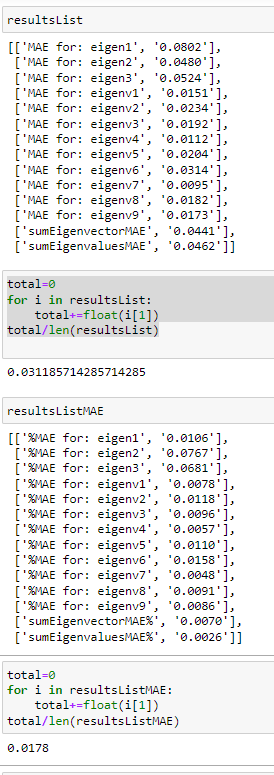 

3501 matrices and values between 0-6  random seed 13099

Non Hermitian

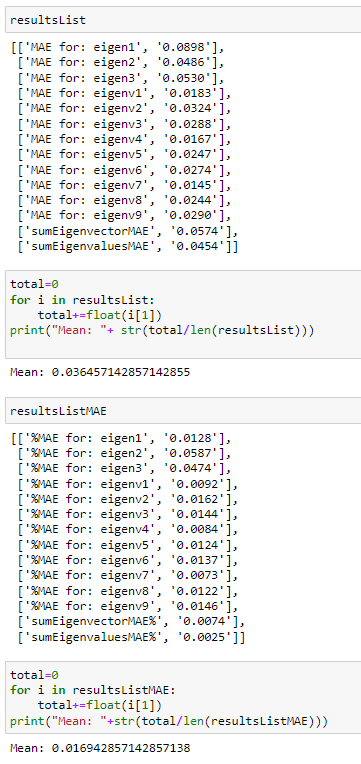